In [4]:
import json
import sys
import fit
import task
import evaluate
import visualize
import networkx as nx
import matplotlib.pyplot as plt

# Write parameters to config.json

In [10]:
config = \
{
    "data": "cora",
    "weighted": "false",
    "directed": "false",
    "method": "graphsage",
    "task": "NodeClassification",
    "emb-path": "embedding/cora-graphsage.emb",
    "eval-path": "evaluation/cora-graphsage.txt",
    "train_percent": [
        0.1,
        0.5,
        0.8
    ],
    "dimensions": 128,
    "iter": 1,
    "seed": 1,
    "p": 1,
    "q": 1,
    "window-size": 10,
    "num-walks": 10,
    "walk-size": 80,
    "num-shuffles": 1,
    "order": 10,
    "edge-feature": "hadamard",
    "K": 5, 
    "batch-size": 128, 
    "batch": 20,
    "layers": 3, 
    "agg-func": "MEAN", 
    "proximity": "first-order", 
    "learning-rate": 0.05, 
    "hidden-channels": 128, 
    "fig-path": "plots/cora-graphsage.png"
}

with open("config.json", "w") as jsonfile:
    jsonfile.write(json.dumps(config))
    print("Write successful")

Write successful


# config.json

In [6]:
config_file = open("config.json", "r")
config = json.load(config_file)

# Read data

In [7]:
data = config['data']

In [8]:
data_path = "data/" + data + ".gpickle"
G = nx.read_gpickle(data_path)

In [9]:
G.number_of_nodes()

5416

In [7]:
G.number_of_edges()

5278

KeyboardInterrupt: 

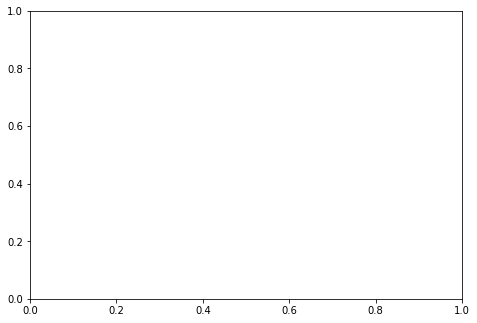

In [8]:
nx.draw(G, with_labels=True)

In [9]:
fit.model(config, G)

Number of walks: 27080
Data size (walks*length): 2166400
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Embedding saved to embedding/cora-n2v.emb.


In [10]:
result = task.train(G, config)

Embedding loaded from embedding/cora-n2v.emb.
training percentage:  0.1
micro F1: 0.7408
macro F1: 0.7234
accuracy score: 0.7408
zero-one loss: 0.2592

training percentage:  0.5
micro F1: 0.8006
macro F1: 0.7936
accuracy score: 0.8006
zero-one loss: 0.1994

training percentage:  0.8
micro F1: 0.8321
macro F1: 0.8262
accuracy score: 0.8321
zero-one loss: 0.1679



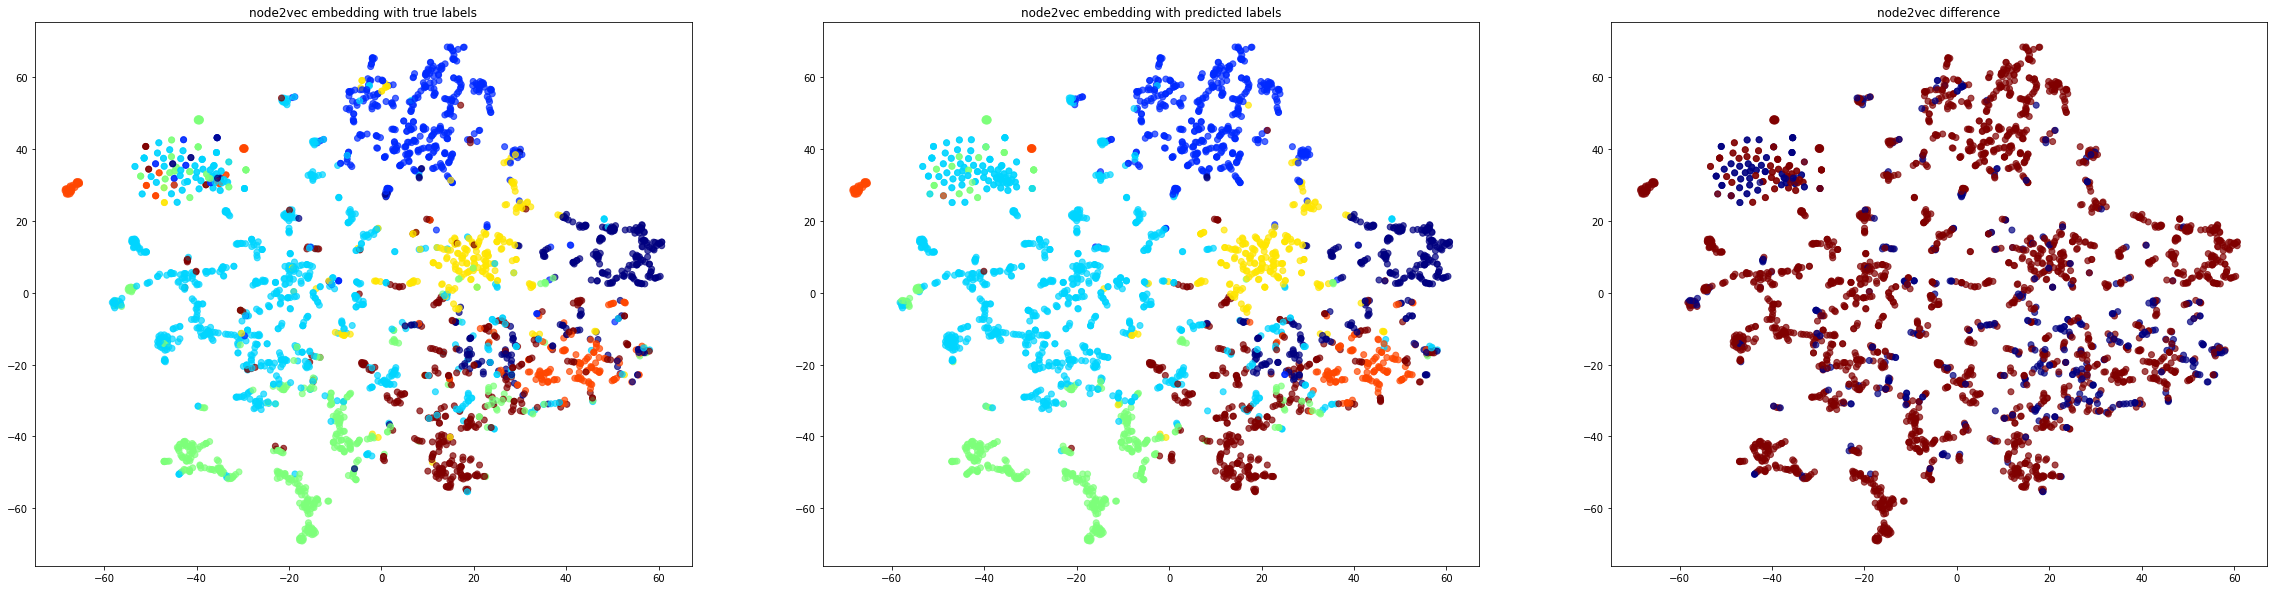

In [11]:
visualize.visualize(result, config)